In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_parquet(r'D:\University\Y4S1\QBUS4934\Modeling\df_concat.parquet')

In [3]:
df.head().T

index,4,8,13,14,16
race_ethnicity_combined,NA,"Black, Non-Hispanic",NA,NA,NA
current_status,Laboratory-confirmed case,Laboratory-confirmed case,Laboratory-confirmed case,Probable Case,Laboratory-confirmed case
cdc_case_earliest_dt,2020-07-07 00:00:00,2020-07-02 00:00:00,2020-10-30 00:00:00,2020-10-30 00:00:00,2020-05-29 00:00:00
cdc_report_dt,2020-07-13 00:00:00,2020-07-04 00:00:00,2020-10-30 00:00:00,2021-02-03 00:00:00,2020-05-29 00:00:00
sex,Male,Male,Male,Male,Male
onset_dt,2020-07-07 00:00:00,2020-07-02 00:00:00,NaT,NaT,NaT
pos_spec_dt,None,None,2020-10-30,2020-10-30,2020-05-29
hosp_yn,No,No,No,No,No
icu_yn,Unknown,No,Missing,Missing,Missing
death_yn,Unknown,Unknown,Missing,No,Missing


In [4]:
df['current_status'].value_counts(dropna=False)

Laboratory-confirmed case    1400366
Probable Case                 114895
Name: current_status, dtype: int64

In [5]:
df['sex'].value_counts(dropna=False)

Female     808661
Male       694824
NA           8970
Unknown      1572
Missing      1215
Other          19
Name: sex, dtype: int64

In [6]:
geo_features = ['county_fips_code', 'res_county', 'res_state']

for cols in df[geo_features].columns:
    print(f'{cols} length: {len(df[cols].unique())}')

county_fips_code length: 1309
res_county length: 901
res_state length: 56


In [7]:
df['res_county'].value_counts(dropna=False)

CLARK        133244
SALT LAKE     50853
CUYAHOGA      36765
DAVIS         32057
WAKE          27390
              ...  
HARDY             1
NOXUBEE           1
MCCREARY          1
SAGUACHE          1
MCLENNAN          1
Name: res_county, Length: 901, dtype: int64

In [8]:
df['res_state'].value_counts(dropna=False)

NC         296627
OH         295039
PA         182184
NV         157148
AR         147555
UT         139264
IA         101882
IL          61394
KS          60209
NJ          22270
VT          14084
LA           8032
NY           6728
MA           5063
AK           4855
DC           2576
PR           2568
GU           2140
CO           2070
VI           1068
WY            901
NH            370
NA            169
MS            145
KY            140
MO            105
FL             94
WV             89
MP             76
TX             60
WA             59
IN             36
GA             31
CT             23
SD             20
WI             19
RI             19
Missing        18
CA             17
OK             15
MT             14
AZ             12
ND             10
VA             10
DE              8
NE              8
MD              6
SC              5
ME              5
NM              5
MI              4
TN              3
HI              3
OR              2
MN              2
AL        

In [9]:
len(df['res_state'].value_counts(dropna=False))

56

NTS: Could be interesting to look at date vs geographical location

Measuring correlation between 'county_fips_code', 'res_county', 'res_state'
* country_FIPS_code should demonstrate multicollinearity wth res_state

In [10]:
# Cross tabulation between GENDER and APPROVE_LOAN
CrosstabResult=pd.crosstab(index=df['county_fips_code'],columns=df['res_county'])
# print(CrosstabResult)
 
# importing the required function
from scipy.stats import chi2_contingency
 
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)
 
# P-Value is the Probability of H0 being True
# If P-Value&gt;0.05 then only we Accept the assumption(H0)
 
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 0.0


In [11]:
# Cross tabulation between GENDER and APPROVE_LOAN
CrosstabResult=pd.crosstab(index=df['county_fips_code'],columns=df['res_state'])
# print(CrosstabResult)
 
# importing the required function
from scipy.stats import chi2_contingency
 
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)
 
# P-Value is the Probability of H0 being True
# If P-Value&gt;0.05 then only we Accept the assumption(H0)
 
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 0.0


In [12]:
# Cross tabulation between GENDER and APPROVE_LOAN
CrosstabResult=pd.crosstab(index=df['res_county'],columns=df['res_state'])
# print(CrosstabResult)
 
# importing the required function
from scipy.stats import chi2_contingency
 
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)
 
# P-Value is the Probability of H0 being True
# If P-Value&gt;0.05 then only we Accept the assumption(H0)
 
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 0.0


Since 'county_fips_code' is already technically in binary encoding, only 'res_county' and 'res_state' require encoding. They will be target encoded because high cardinality. Target variable, 'pna_yn' will be dummy encoded.

https://medium.com/analytics-vidhya/target-encoding-vs-one-hot-encoding-with-simple-examples-276a7e7b3e64
https://towardsdatascience.com/targeting-multicollinearity-with-python-3bd3b4088d0b
https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/
https://towardsdatascience.com/statistics-in-python-collinearity-and-multicollinearity-4cc4dcd82b3f

In [13]:
target = df['pna_yn']
target = pd.get_dummies(target, drop_first=True)
target.head(5)

,Yes
index,
4,0
8,0
13,0
14,0
16,0


In [14]:
df['pna_yn_yes'] = target
df = df.drop(['pna_yn'], axis=1)

In [15]:
df.head().T

index,4,8,13,14,16
race_ethnicity_combined,NA,"Black, Non-Hispanic",NA,NA,NA
current_status,Laboratory-confirmed case,Laboratory-confirmed case,Laboratory-confirmed case,Probable Case,Laboratory-confirmed case
cdc_case_earliest_dt,2020-07-07 00:00:00,2020-07-02 00:00:00,2020-10-30 00:00:00,2020-10-30 00:00:00,2020-05-29 00:00:00
cdc_report_dt,2020-07-13 00:00:00,2020-07-04 00:00:00,2020-10-30 00:00:00,2021-02-03 00:00:00,2020-05-29 00:00:00
sex,Male,Male,Male,Male,Male
onset_dt,2020-07-07 00:00:00,2020-07-02 00:00:00,NaT,NaT,NaT
pos_spec_dt,None,None,2020-10-30,2020-10-30,2020-05-29
hosp_yn,No,No,No,No,No
icu_yn,Unknown,No,Missing,Missing,Missing
death_yn,Unknown,Unknown,Missing,No,Missing


In [16]:
from category_encoders import TargetEncoder
encoder = TargetEncoder()

df['res_county_encoded'] = encoder.fit_transform(df['res_county'], df['pna_yn_yes'])
df['res_state_encoded'] = encoder.fit_transform(df['res_state'], df['pna_yn_yes'])

C:\Users\Owner\anaconda3\envs\qbus4934\lib\site-packages\category_encoders\target_encoder.py:122: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
C:\Users\Owner\anaconda3\envs\qbus4934\lib\site-packages\category_encoders\target_encoder.py:127: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


In [17]:
df = df.drop(['res_county'], axis=1)
df = df.drop(['res_state'], axis=1)

In [18]:
feat = ['county_fips_code', 'res_county_encoded', 'res_state_encoded']
df2 = df[feat]
df2.head(5)

,county_fips_code,res_county_encoded,res_state_encoded
index,,,
4,17001,0.070389,0.225918
8,17001,0.070389,0.225918
13,72001,0.026786,0.430685
14,72001,0.026786,0.430685
16,72001,0.026786,0.430685


In [19]:
df2.isna().sum()

county_fips_code      8863
res_county_encoded       0
res_state_encoded        0
dtype: int64

In [20]:
df2['county_fips_code'][df2['county_fips_code'] == 'NA'].count()

169

count_fips_code has 836 missing values, and has 31 'NA' string

Another reason to drop count_fips_code is because it has more missing value, alongside high cardinality. drop na for now

In [21]:
df2 = df2.dropna() # drop nan values
df2.isna().sum()

county_fips_code      0
res_county_encoded    0
res_state_encoded     0
dtype: int64

In [22]:
df2 = df2[~df2['county_fips_code'].str.contains('NA')] # drop na strings
df2['county_fips_code'][df2['county_fips_code'] == 'NA'].count()

0

In [23]:
df2['county_fips_code'].astype('int32')
df2.dtypes

county_fips_code       object
res_county_encoded    float64
res_state_encoded     float64
dtype: object

C:\Users\Owner\AppData\Local\Temp\ipykernel_26704\3923591580.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df2.corr(method = 'spearman')


<AxesSubplot: >

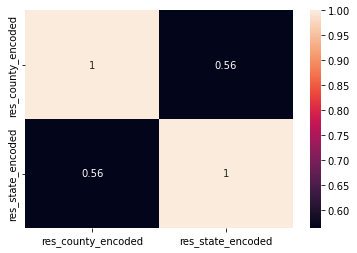

In [24]:
import seaborn as sns

corr = df2.corr(method = 'spearman')
sns.heatmap(corr, annot=True)

Based on spearman, county_fips_code and res_state are moderately correlated

In [25]:
from sklearn.linear_model import LinearRegression
def calculate_vif(df, features):    
    vif, tolerance = {}, {}
    # all the features that you want to examine
    for feature in features:
        # extract all the other features you will regress against
        X = [f for f in features if f != feature]        
        X, y = df[X], df[feature]
        # extract r-squared from the fit
        r2 = LinearRegression().fit(X, y).score(X, y)                
        
        # calculate tolerance
        tolerance[feature] = 1 - r2
        # calculate VIF
        vif[feature] = 1/(tolerance[feature])
    # return VIF DataFrame
    return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

calculate_vif(df=df2, features=feat)

,VIF,Tolerance
county_fips_code,1.001048,0.998953
res_county_encoded,2.471359,0.404636
res_state_encoded,2.469967,0.404864


Interestingly based on VIF, these three categories would not demonstrate high multicollinearity